In [2]:
%matplotlib inline

# Linear Superposition of Plane Waves

In [3]:
import numpy as np
from numpy import pi, exp, sqrt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Let $\phi(x,t)$ be the superposition of monochromatic plane waves, such that: 

\begin{equation}
\phi(x,t) = \int_{-\infty}^{\infty} A(k) e^{i(kx-\omega t)}dk.
\end{equation}

For a given initial condition $\phi(x,0) = a(x)e^{ik_0x}$ we can write:

\begin{equation}
 \phi(x,0) = \int_{-\infty}^{\infty} A(k)e^{ikx} dk,
\end{equation}

which taking the Fourier transform leads to:

\begin{equation}
A(k) = \frac{1}{2\pi}\int_{-\infty}^{\infty} a(x) e^{i(k-k_0)x}dx
\end{equation}

For large $x$, the integral above oscilates fast and cancells out except around $k_0$. Taking as an example $a(x)$ to have the form:

\begin{equation}
a(x) = exp\left[{-\left(\frac{3x}{\sigma(x)}\right)^2}\right],
\end{equation}

we obtain the following amplitude:

In [4]:
g = 9.8
T0 = 7 #  peak period 
w0 = 2*pi/T0 # peak frequency
k0 = w0**2/g # peak wavenumber
L0 = 2*pi/k0 # peak wavelenght
cg0 = 0.5*np.sqrt(g/k0) # group velocity

t = np.arange(0,8*T0,0.2) # time 
x = np.arange(-10*L0,10*L0,2) # positions

k = np.linspace(-7*k0, 7*k0, 1000) #wavenumbers
dk = np.diff(k)[0]
w = np.sqrt(g*abs(k)) # frequencies
Ak = np.zeros(k.shape)
for i in range(k.shape[0]):
    Ak[i] = 1/(2*pi) * np.sum(np.exp(-(3*x/x.std())**2)*np.exp(1j*x*(k[i]-k0)) )

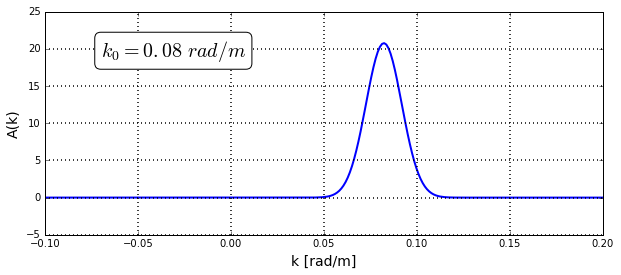

In [5]:
fig=plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
plt.plot(k,Ak, linewidth=2)
plt.xlim([-0.1,0.2])
plt.xlabel('k [rad/m]', fontsize=14)
plt.ylabel('A(k)', fontsize=14)
plt.grid(linewidth=1.5)
ax.annotate('$k_0 = %.2f\ rad / m$'%k0, xy=(0.1, .8),textcoords='axes fraction',
            fontsize=20, bbox=dict(boxstyle="round", fc="w"))



Now integrating over all wavenumbers to solve for $\phi(x,t)$:

In [6]:
Nx = x.shape[0]
Nt = t.shape[0]
packet = np.zeros([Nt,Nx])

packet = np.zeros([Nt,Nx])
for i in range(Nt):
    for j in range(Nx):
        packet[i,j] = np.sum(Ak*np.exp(1j * (k*x[j] - w*t[i])  ))*dk

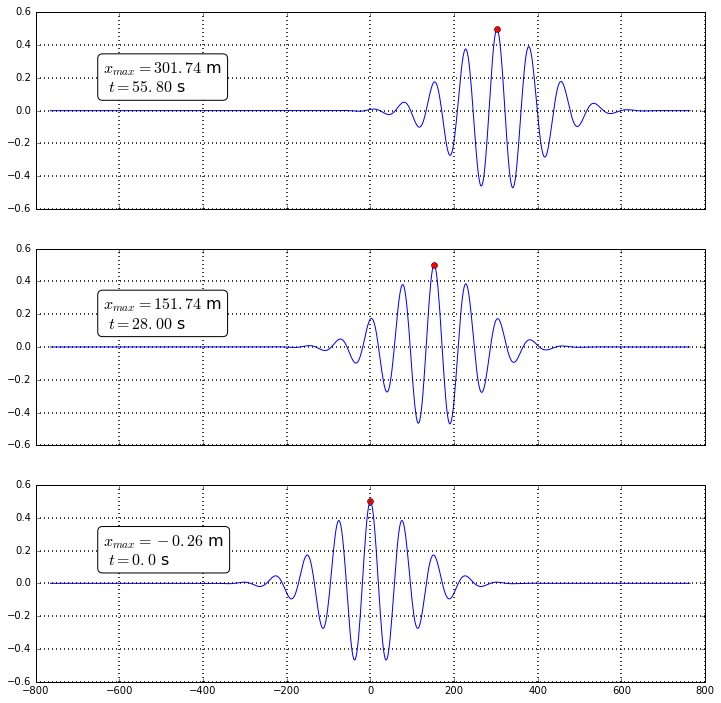

In [37]:
fig,ax=plt.subplots(3,sharex=True, figsize=(12,12))
ax[0].plot(x,packet[Nt-1])
ind = np.where(packet[Nt-1]==packet[Nt-1].max())[0][0]
ax[0].plot(x[ind],packet[Nt-1, ind], 'or')
ax[0].grid(linewidth=1.5)
ax[0].annotate('$x_{max}=%.2f$ m \n $t = %.2f$ s'%(x[ind], t[Nt-1]), (0.1, .6),textcoords='axes fraction',fontsize=16, bbox=dict(boxstyle="round", fc="w"))
ax[1].plot(x,packet[Nt/2])
ind = np.where(packet[Nt/2]==packet[Nt/2].max())[0][0]
ax[1].plot(x[ind],packet[Nt/2, ind], 'or')
ax[1].grid(linewidth=1.5)
ax[1].annotate('$x_{max}=%.2f$ m \n $t = %.2f$ s'%(x[ind], t[Nt/2]), (0.1, .6),textcoords='axes fraction',fontsize=16, bbox=dict(boxstyle="round", fc="w"))
ax[2].plot(x,packet[0])
ind = np.where(packet[0]==packet[0].max())[0][0]
ax[2].plot(x[ind],packet[0, ind], 'or')
ax[2].grid(linewidth=1.5)
ax[2].annotate('$x_{max}=%.2f$ m \n $t = %s$ s'%(x[ind], t[0]), (0.1, .6),textcoords='axes fraction',fontsize=16, bbox=dict(boxstyle="round", fc="w"))



From the plots above we have:

$c_g = \frac{\Delta x}{\Delta t} \approx \frac{301.74}{55.80}$ = 5.407

From the input parameters, for 7s deep water waves we have:

$c_g = \frac{1}{2}\sqrt{\frac{g}{k}} =  \frac{1}{2}\sqrt{\frac{9.8}{0.0822}} \approx 5.459$

### Pretty close, uh?